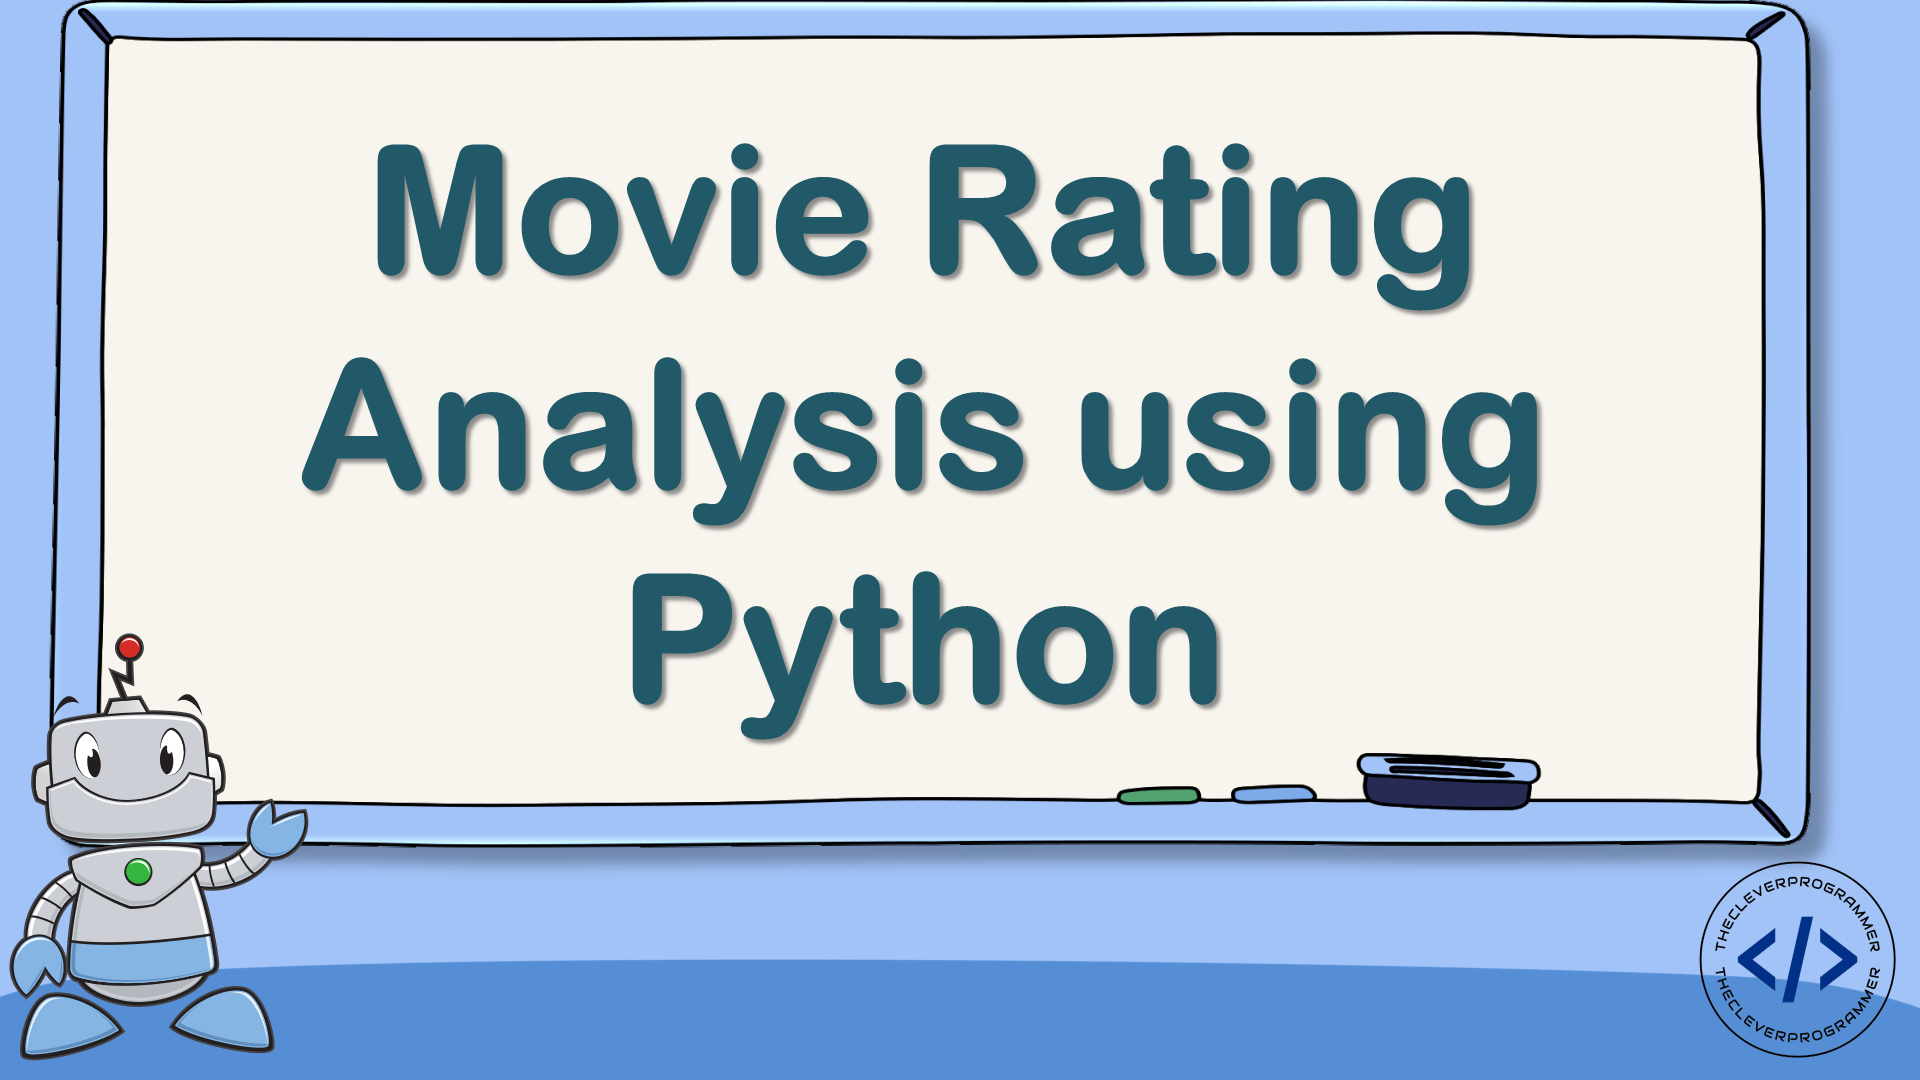

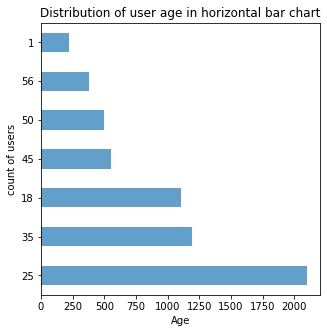

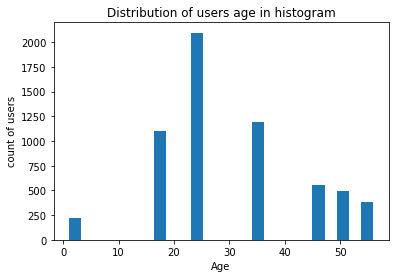

Distribution of user age in Table of age-groups:

    Age age_group
0    56     50-59
1    25     20-29
2    45     40-49
4    50     50-59
5    35     30-39
16   18     10-19
17    1       0-9


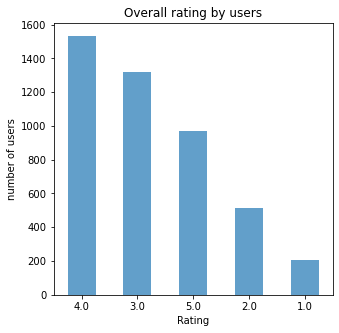

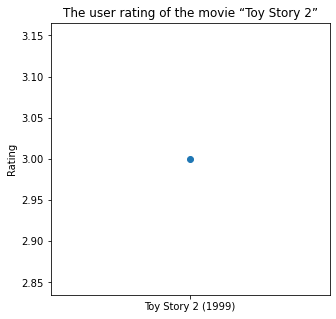

Average viewership age-group:

               MovieName age_group
3044  Toy Story 2 (1999)       0-9


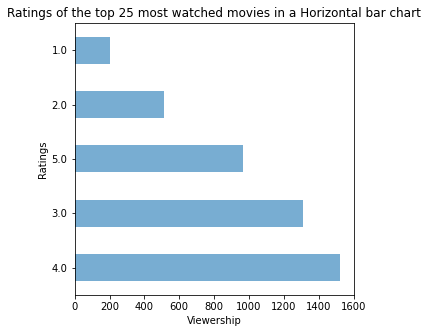

The rating of the movie with userID 2696:

      UserID  Ratings
2694    2696      3.0


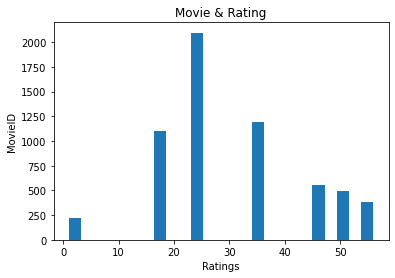

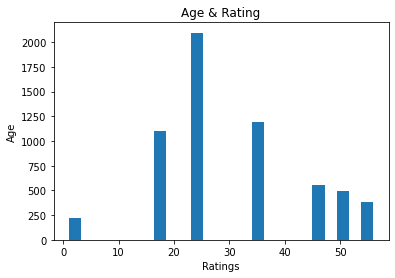

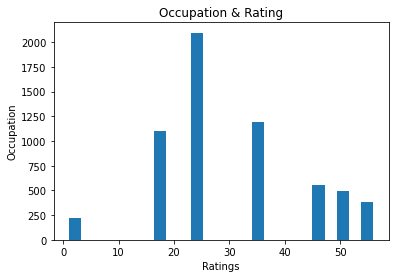

,Model,Score
3,Random Forest,98.54
8,Decision Tree,98.54
1,KNN,57.57
0,Support Vector Machines,32.94
2,Logistic Regression,32.76
6,Stochastic Gradient Decent,32.54
4,Naive Bayes,32.23
7,Linear SVC,28.65
5,Perceptron,28.61


In [3]:
#1.IMPORT LIBRARIES

import pandas as pd
import numpy as np
import random as rnd
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#2.DATA ACQUISITION

#Data acquisition of the movies dataset
df_movie=pd.read_csv('movie.csv',encoding='utf-8', sep = '::', engine='python')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()
df_movie.tail()

#Data acquisition of the rating dataset
df_rating = pd.read_csv('rating.csv',encoding='utf-8', sep = '::', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()
df_rating.tail()

#Data acquisition of the users dataset
df_user = pd.read_csv('user.csv',encoding='utf-8', sep = '::', engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()
df_user.tail()

#Joining of all 3 datas
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

#3.DATA VISUALIZATION

#Visualize user age distribution

##using horizontal bar chart
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(5,5))
plt.ylabel('count of users')
plt.xlabel('Age')
plt.title('Distribution of user age in horizontal bar chart')
plt.show()

##using histogram
df.Age.plot.hist(bins=25)
plt.title("Distribution of users age in histogram")
plt.ylabel('count of users')
plt.xlabel('Age')
plt.show()

##using a stat table
print('Distribution of user age in Table of age-groups:')
print()
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
print(df[['Age', 'age_group']].drop_duplicates()[:10])


#Visualize overall rating by users
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(5,5))
plt.xlabel('Rating')
plt.ylabel('number of users')
plt.title('Overall rating by users')
plt.xticks(rotation=360)
plt.show()

groupedby_movieName = df.groupby('MovieName')
groupedby_rating = df.groupby('Ratings')
groupedby_uid = df.groupby('UserID')


movies = df.groupby('MovieName').size().sort_values(ascending=True)[:1000]
movies

ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

#Find and visualize the user rating of the movie “Toy Story 2”
plt.figure(figsize=(5,5))
plt.scatter(ToyStory_data['MovieName'],ToyStory_data['Ratings'])
plt.ylabel('Rating')
plt.title('The user rating of the movie “Toy Story 2”')
plt.show()

#Find and visualize the viewership of the movie “Toy Story” by age group
print('Average viewership age-group:')
print()
print(ToyStory_data[['MovieName','age_group']])

#Find and visualize the top 25 movies by viewership rating
top_25 = df[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(5,5))
plt.xlabel('Viewership')
plt.ylabel('Ratings')
plt.title('Ratings of the top 25 most watched movies in a Horizontal bar chart')
plt.show()

#Visualize the rating data by user of user id = 2696
print('The rating of the movie with userID 2696:')
print()
userid_2696 = groupedby_uid.get_group(2696)
print(userid_2696[['UserID','Ratings']])

#First 500 extracted records
first_500 = df[500:]
first_500.dropna(inplace=True)

#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

#Use rating as label
labels = first_500[['Ratings']].values

#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

#Create a histogram for movie
df.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')
plt.show()

#Create a histogram for age
df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')
plt.show()

#Create a histogram for occupation
df.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')
plt.show()

#DATA MODELLING

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)



